#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and how well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal :
- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Determine the optimal value of lambda for ridge and lasso regression.
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- The model will be a good way for the management to understand the pricing dynamics of a new market.

#### The solution is divided into the following sections:

- Data understanding
- Data clean up
- EDA
- Data preparation
- Model building and evaluation
- Observation and inference

In [1]:
## Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

# Ignore warnings
warnings.filterwarnings('ignore')

# Step 1: Data Understanding

In [2]:
# Reading data from csv
housing_df= pd.read_csv('data/train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking Shape of the dataframe
housing_df.shape

(1460, 81)

In [4]:
# Checking dataframe info
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking statistics
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Step 2: Data Clean up

#### Changing Data Type
- First column in data dictionary that is MSSubClass (Identifies the type of dwelling involved in the sale) is actually a categorical feature but it's represented as numeric one, lets convert it right away into the categorical object

In [6]:
# Changing data type of MSSubClass
housing_df['MSSubClass']= housing_df['MSSubClass'].astype('object')

#### Unique Value count in categorical columns

In [7]:
# Checking unique values 

categorical_cols= housing_df.select_dtypes(include= 'object').columns

for col in categorical_cols:
  print('\nColumn Name:',col)
  print(housing_df[col].value_counts(dropna= False))


Column Name: MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

Column Name: MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Column Name: Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Column Name: Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

Column Name: LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Column Name: LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Column Name: Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Column Name: LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Column Name: LandSlope
Gtl    1382
Mod      65
Sev      13
Name: La

##### Missing values check

In [8]:
## Checking percentage of missing values
missing_info= round(housing_df.isna().sum() * 100/housing_df.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

### Inferences:

- There are in total of 19 columns with missing Values
- A lot of columns are present with very high percentage of missing values
- As per data dictionary below columns are having null/missing values, means that feature is not available in the house and these missing values can be converted to NA
#### PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual

In [9]:
# Replacing NaN with 'NA' for below columns based on data dictionary definition
replacable_cols= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
housing_df[replacable_cols]= housing_df[replacable_cols].fillna('NA')

In [10]:
# Checking Remaining columns for missing values
missing_info= round(housing_df.isna().sum() * 100/housing_df.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

### Inferences:

- GarageYrBlt: Earlier we have observed that below were the stats for missing values
 - GarageType       5.55
 - GarageYrBlt      5.55
 - GarageFinish     5.55
 - GarageQual       5.55
 - GarageCond       5.55
 - It points that, all the missing data is related to houses which doesn't have the garage. So Garage was never built in that case. We can Impute it to 0 for now, so that we can understand by it that house doesn't have garage built ever
- MasVnrType:
 - As per Data dictionary, records with value None represent that the feature isn't available and we can impute the same for NaN values
- Electrical:
 - Data dictionary doesn't have any representation for NaN records, and there is only single record with Null value. We can impute it to NA and consider that feature isn't available to the house.

In [11]:
# Imputing missing values of GarageYrBlt column
housing_df['GarageYrBlt']= housing_df['GarageYrBlt'].fillna(0)

# Imputing missing values of MasVnrType column
housing_df['MasVnrType']= housing_df['MasVnrType'].fillna('None').replace(['None'], 'NA')

# Imputing missing values of Electrical column
housing_df['Electrical']= housing_df['Electrical'].fillna('NA')

# Performing Imputation using median for missing values in LotFrontage, MasVnrArea columns

housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median(), inplace= True)
housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].median(), inplace= True)

### Outcome of Data Clean up:
 - we have dealt with most of the missing/null values


# Step 3: EDA

### Visualization of data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

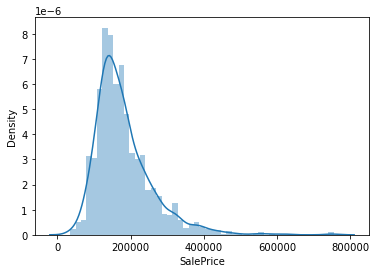

In [12]:
# Checking distribution of SalePrice
sns.distplot(housing_df['SalePrice'])

### Visualizing Numeric features against Sale Price

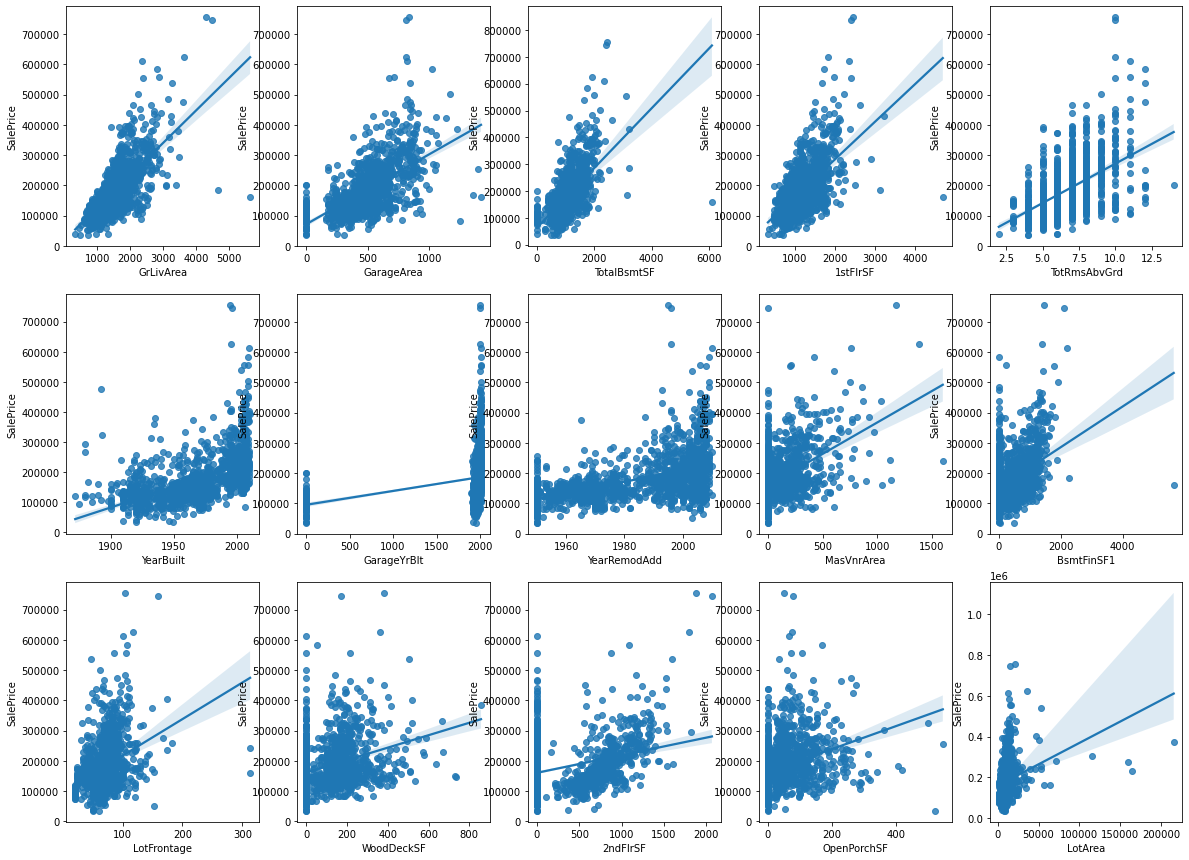

In [13]:
# Plotting numeric variables against SalePrice

numeric_cols= ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','GarageYrBlt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']

plt.figure(figsize=[20, 15])

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,5,i)
    title_text= f'{col} vs cnt'
    x_label= f'{col}'
    fig= sns.regplot(data= housing_df, x= col, y= 'SalePrice')
plt.show()

### Visualizing Categorical features against Sale Price

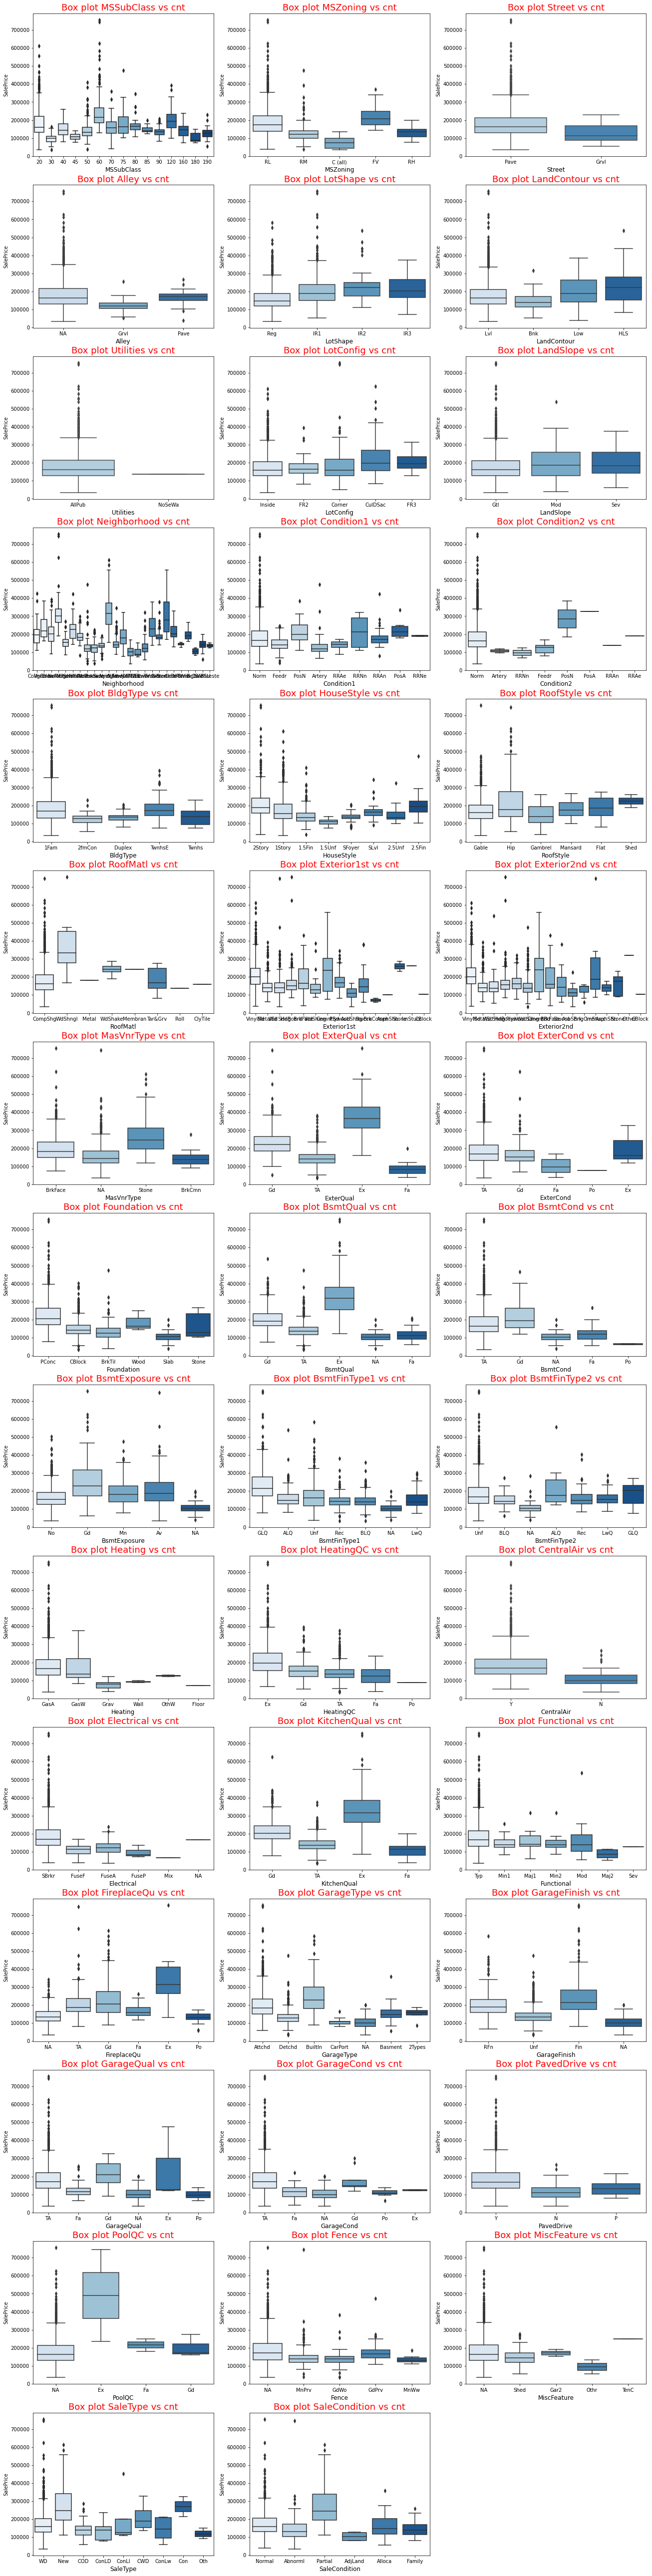

In [14]:
# Box plot of categorical columns

categorical_cols= housing_df.select_dtypes(include= 'object').columns

plt.figure(figsize=[22, 100])

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(16,3,i)
    title_text= f'Box plot {col} vs cnt'
    x_label= f'{col}'
    fig= sns.boxplot(data= housing_df, x= col, y= 'SalePrice', palette= 'Blues')
    fig.set_title(title_text, fontdict= { 'fontsize': 18, 'color': 'Red'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Black'})
plt.show()

- Checking Neighborhood plot separately as it has high number of categories

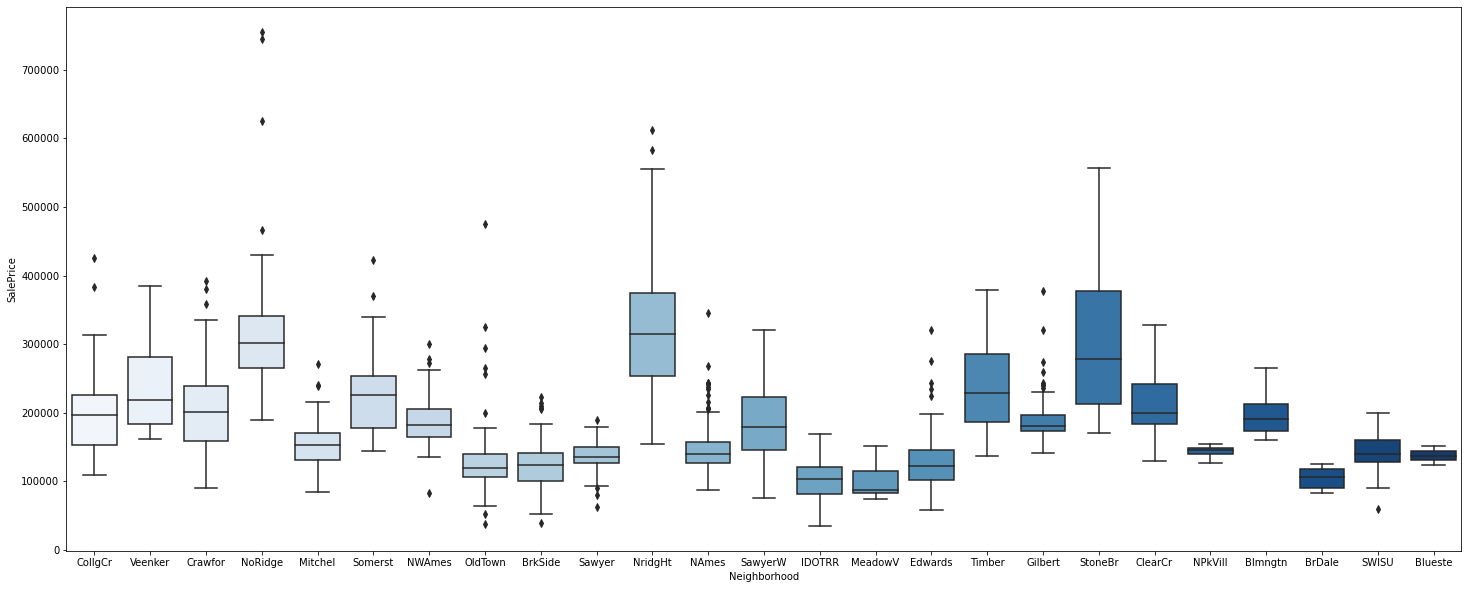

In [15]:
# Checking Neighborhood plot separately as it has high number of categories
plt.figure(figsize=[25,10])
sns.boxplot(data= housing_df, x= 'Neighborhood', y= 'SalePrice', palette= 'Blues')
plt.show()

### Correlation Heatmap

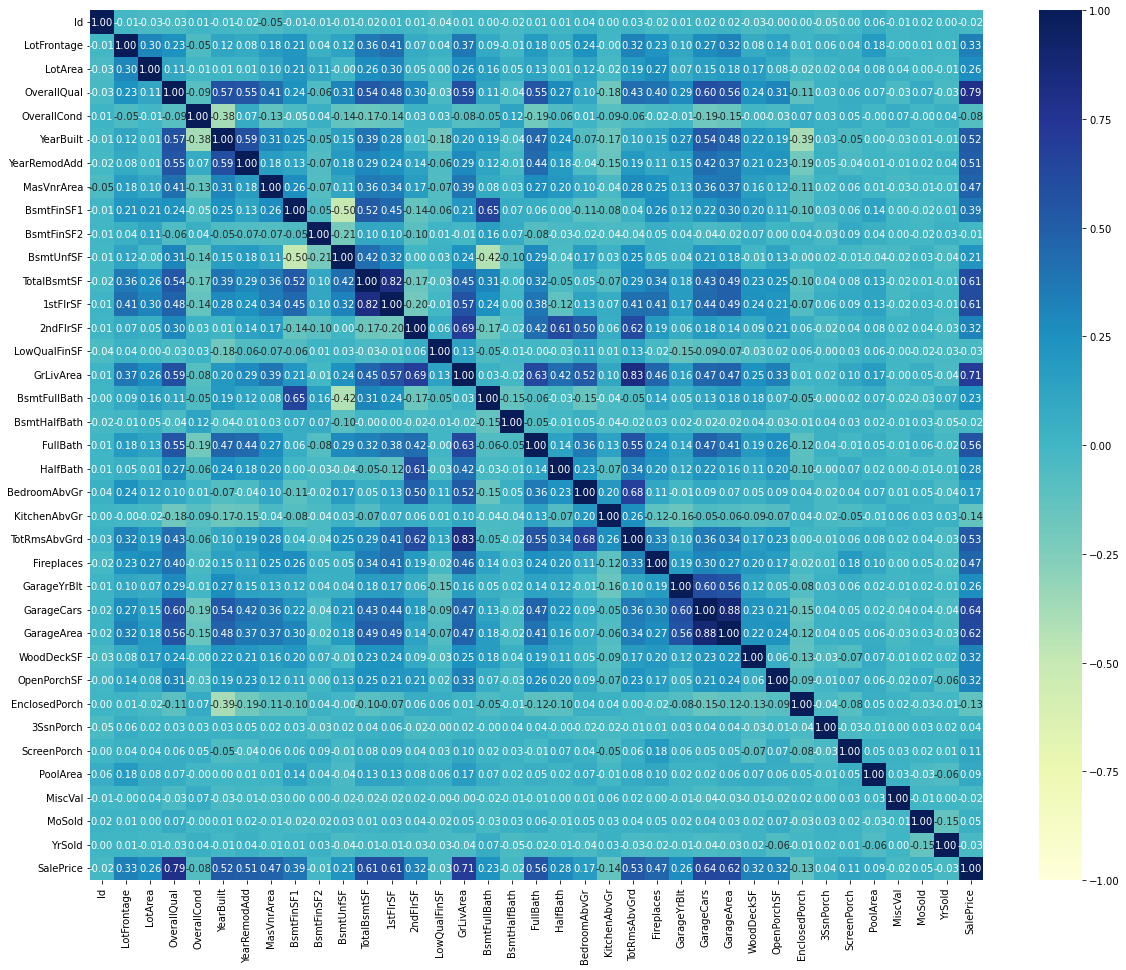

In [16]:
# Creating correlation heatmap
plt.figure(figsize = (20, 16))
sns.heatmap(housing_df.corr(), annot= True, fmt = '.2f', cmap= 'YlGnBu', vmin= -1, vmax= 1)
plt.show()

- Heat Map shows high correlation for below columns:
 - GrLivArea and TotRmsAbvGrd: 0.83
 - GarageCars and GarageArea: 0.88

so removing GarageCars and TotRmsAbvGrd

In [17]:
# Dropping GarageCars and TotRmsAbvGrd
housing_df.drop(['GarageCars','TotRmsAbvGrd'], axis= 1, inplace= True)
housing_df.shape

(1460, 79)

#### Derived variables
- Deriving variables to calculate
 - property age by subtracting Year built from year Sold
 - property remodeled age by subtracting year remodeled from year sold   

In [18]:
# PropertyAge -  Property Age from yearsold - yearbuilt
housing_df['PropertyAge'] = (housing_df['YrSold'] - housing_df['YearBuilt'])
housing_df['PropertyRemodeledAge'] = (housing_df['YrSold'] - housing_df['YearRemodAdd'])

### Inferences

#### Numeric Feature visualisation using RegPlot
- SalePrice is right sckewed 
- numeic feature: 'GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea' have outlier.
- They all have somewhat linear relation with SalePrice as well.

#### Categorical Feature visualisation using BoxPlot
- SalePrice are higher for Floating Village Residential zone which followed by Residential Low Density zones.
- SalePrice are higher for Hillside properties.
- SaleProce is higher for the houses connected to Pave street.
- SalePrice is higher for the houses with higher OverallQual rating. Houses with Excellent quality of the material on the exterior have highest price. Price reduces as quality decreases.
- SalePrice is high for houses having Neighbourhood : Northridge Heights, Stone Brook, Northridge. price is comparatively lower in Iowa DOT and Rail Road, Meadow Village neighbourhood.
- SalePrice is higher where Wood Shingles are used for roof material.
- SalePrice is higher for the houses having Excellent Heating quality and  price reduces with Heating quality type and least for the houses having Poor heating quality.
- SalePrice is very high for Good Living Quarters type basement finished area and if the beasement height is more than 100+ inches and least for the houses not having basement.
- Houses having atleast 1 fireplace, have higher  SalePrice. If Fireplace quality is 'Excellent - Exceptional Masonry Fireplace' then the  SalePrice is the highest.
- Houses having a garage as part of the house (typically has room above garage) and garage interior 'finish' or 'Rough Finished', have higest  SalePrice. Price is lower for the houses having no garage.
- Houses with garage in car capacity of 3 have highest  SalePrice.
- Houses having Poured Contrete foundation has higher SalePrice. Price for houses having Stone and Wood foundations is positive skewed.
- SalePrice is high for houses with 3 Full bathrooms above grade.

# Step 4: Data Preparation

we have seen during EDA that target variable SalePrice is not normally distributed and it's skewed to the right
- to fix that we can use log transformation on target variable

#### Transforming target variable using log transformation

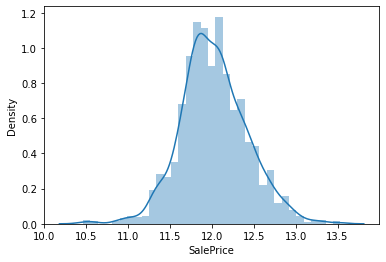

In [19]:
# First checking whether using log transformation, it solves the problem of skewness

sns.distplot(np.log(housing_df['SalePrice']))
plt.show()

It is observed that using log transformation we are able to get normal distribution

In [20]:
# Transforming 'SalePrice'
housing_df['SalePrice']= np.log(housing_df['SalePrice'])

#### Dropping columns
- Dropping ID column as it just contains index
- Dropping 'YrSold','YearBuilt','YearRemodAdd' as we have alreadt derived columns from them like property Age and property Remodeled Age

In [21]:
# Dropping ID Column
housing_df.drop(['Id'], axis=1, inplace= True)
housing_df.drop(['YrSold'], axis=1, inplace= True)
housing_df.drop(['YearBuilt'], axis=1, inplace= True)
housing_df.drop(['YearRemodAdd'], axis=1, inplace= True)
housing_df.drop(['MoSold'], axis=1, inplace= True)

#### Creating dummy and encoding for categorical variables

In [22]:
# getting categorical variables
categorical_cols = housing_df.select_dtypes(include= 'object')

In [23]:
# 'Street','Utilities', 'CentralAir' have 2 unique data, so we are encoding with 0 and 1
housing_df['Street']= housing_df.Street.map(lambda x: 1 if x== 'Pave' else 0)
housing_df['Utilities']= housing_df.Utilities.map(lambda x: 1 if x== 'AllPub' else 0)
housing_df['CentralAir']= housing_df.CentralAir.map(lambda x: 1 if x== 'Y' else 0)

In [24]:
# creating dummies for rest of the categorical variables
exclude = ['Street', 'Utilities', 'CentralAir']  # As they have already encoded to 0 and 1
remaining_categorical_cols = [col for col in categorical_cols.columns.to_list() if col not in exclude]

# creating dummies
dummies= pd.get_dummies(housing_df[remaining_categorical_cols], drop_first=True)

In [25]:
# checking dummies
dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In toal 235 dummies have been created by the system

In [26]:
# Concatinating dummies with housing_df dataframe and droping original features
print('Housing dataframe original shape: ', housing_df.shape)
print('Dummies dataframe Shape: ', dummies.shape)
housing_df.drop(remaining_categorical_cols, axis=1, inplace= True)
housing_df= pd.concat([housing_df, dummies], axis= 1)
print('Final shape of housing dataframe after merge: ', housing_df.shape)

Housing dataframe original shape:  (1460, 76)
Dummies dataframe Shape:  (1460, 235)
Final shape of housing dataframe after merge:  (1460, 270)


In [27]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 270 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int64(31), uint8(235)
memory usage: 734.4 KB


All Columns are numeric now

### Splitting the dataset into train-test

In [28]:
# Train-Test Split
y= housing_df['SalePrice']
X= housing_df.drop('SalePrice', axis= 1)

#### Splitting dataset into train-test

In [29]:
# Splitting into train-test with 70:30 ratio

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

# Checking shape of train-test
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (1021, 269)
X_test:  (439, 269)
y_train:  (1021,)
y_test:  (439,)


#### Scale features

In [30]:
# Using StandardScaler to scale features
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge', 'PropertyRemodeledAge', 'BsmtUnfSF', 'GarageYrBlt']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge', 'PropertyRemodeledAge', 'BsmtUnfSF','GarageYrBlt']])
X_test[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge', 'PropertyRemodeledAge', 'BsmtUnfSF', 'GarageYrBlt']] = scaler.fit_transform(X_test[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge', 'PropertyRemodeledAge', 'BsmtUnfSF','GarageYrBlt']])

In [31]:
# Checking train dataset after scaling
X_train.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1452,-1.523875,-0.624089,1,1,-0.822194,-0.508029,-0.143650,0.218347,-0.280483,-1.280843,...,0,0,0,0,1,0,0,0,1,0
762,0.082045,-0.185863,1,1,0.636468,-0.508029,-0.607545,-0.919206,-0.280483,0.362572,...,0,0,0,0,0,0,0,0,1,0
932,0.602884,0.081575,1,1,2.095130,-0.508029,1.143660,-0.971407,-0.280483,2.996077,...,0,0,0,0,1,0,0,0,1,0
435,-1.176649,-0.006953,1,1,0.636468,0.392488,-0.607545,-0.134012,1.994578,-1.123686,...,0,1,0,0,0,0,0,0,1,0
629,0.516078,-0.152323,1,1,-0.092863,-0.508029,0.894316,0.385826,1.941670,-0.634254,...,0,0,0,0,1,0,0,0,1,0


In [32]:
X_test.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,0.036459,-0.276923,1,1,-0.024293,2.148362,-0.500298,0.506366,-0.308377,-0.378028,...,0,0,0,0,1,0,0,0,1,0
1105,1.477454,0.400591,1,1,1.397645,-0.538621,1.324162,1.332125,-0.308377,-0.297177,...,0,0,0,0,1,0,0,0,1,0
413,-0.684039,-0.180639,1,1,-0.735261,0.357040,-0.500298,-0.977314,-0.308377,1.035704,...,0,0,0,0,1,0,0,0,1,0
522,-0.992824,-0.878961,1,1,-0.024293,1.252701,-0.500298,-0.084421,-0.308377,0.104766,...,0,0,0,0,1,0,0,0,1,0
1036,1.014277,0.513804,1,1,2.108613,-0.538621,-0.147502,1.309747,-0.308377,0.088596,...,0,0,0,0,1,0,0,0,1,0


# Step 5: Model Building and Evaluation

## 5a : Let's start by building a simple linear regression model using RFE

- As there are around 269 features, we will use RFE to get the best 100 features and use the new the features for further analysis

In [33]:
# Running RFE with the output number of the variable equal to 100

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=100)            
rfe = rfe.fit(X_train, y_train)


In [34]:
# Assign the columns selected by RFE to cols

cols = X_train.columns[rfe.support_]

# assign the 100 features selected using RFE to a dataframe and view them

df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df

,Variable,rfe_support,rfe_ranking
0,Utilities,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,BsmtFinSF2,True,1
...,...,...,...
95,MiscFeature_NA,True,1
96,MiscFeature_Othr,True,1
97,MiscFeature_Shed,True,1
98,MiscFeature_TenC,True,1


In [35]:
# Predict the R2 score on train and test

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score on train dataset is: ',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score on test dataset is: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 score on train dataset is:  0.9499541974307405
R2 score on test dataset is:  0.8547080161904911
7.927972398434578
10.796347409317132
0.007764909303070106
0.024593046490471827


#### Inference:
- Simple linear regression has performed OK on the test set with all variables
- Let's check other available methods of Regression


For Ridge and Lasso regression, Let's select only top 100 features

In [36]:
# Assign the 100 columns to X_train_rfe

X_train_rfe = X_train[cols]

# Selecting the new 100 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### 5b: Ridge Regtression

In [37]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

# Selecting few values for alpha
range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
range2= list(range(2, 100))
range1.extend(range2)
params= {'alpha': range1}

ridge = Ridge()

# cross validation
folds = 3
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 112 candidates, totalling 336 fits


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [38]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
15,3,-0.084786,-0.096493,1
16,4,-0.085678,-0.096516,2
14,2,-0.083497,-0.096610,3
17,5,-0.086357,-0.096618,4
8,0.5,-0.079071,-0.096703,5
...,...,...,...,...
107,95,-0.099806,-0.104855,108
108,96,-0.099864,-0.104899,109
109,97,-0.099922,-0.104943,110
110,98,-0.099980,-0.104985,111


In [39]:
print(ridge_model_cv.best_estimator_)

Ridge(alpha=3)


In [40]:
# Checking best MAE
ridge_model_cv.best_score_

-0.09649267740408103

- we get the optimal value of alpha as 3

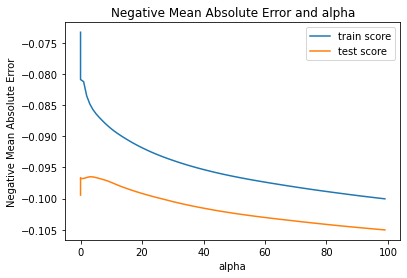

In [41]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [42]:
# check the coefficient values with lambda = 3.0
# Fitting model using best_estimator_

ridge= ridge_model_cv.best_estimator_
ridge.fit(X_train, y_train)

ridge.coef_

array([ 0.02787319,  0.09957537,  0.0423611 ,  0.0090651 ,  0.0048128 ,
       -0.01430345, -0.00329821,  0.11401771,  0.06095788,  0.036781  ,
        0.00847128,  0.07599982,  0.03360487, -0.08779563, -0.07945956,
       -0.0505679 , -0.00689596, -0.03196564, -0.00211035, -0.11539359,
       -0.09725371,  0.0921411 ,  0.06717196, -0.0266206 ,  0.11425267,
        0.11930581,  0.09096573,  0.14121737,  0.15362762,  0.07391222,
        0.01696258,  0.07563331,  0.04214748,  0.05944107,  0.01794293,
       -0.27806933,  0.01771952, -0.03196564, -0.12574039, -0.08901726,
        0.02186411, -0.02135967,  0.08552453,  0.10571343,  0.04047389,
        0.05165869,  0.1081214 ,  0.05421679,  0.13029728, -0.14794957,
        0.09304106,  0.00224843,  0.01529839,  0.01237827,  0.00224843,
       -0.00951127, -0.04088803, -0.00163707, -0.06971983, -0.03000115,
       -0.03888152, -0.03000115, -0.01976011,  0.07693069, -0.03000115,
       -0.03000115, -0.03000115,  0.09796823, -0.13078378,  0.04

In [43]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score on train set: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score on test set: ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test: ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for train set: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test set: ', mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 Score on train set:  0.8919299826354252
R2 Score on test set:  0.8807956451001412
RSS Train:  17.119839642475153
RSS Test:  8.857829554380285
Mean squared error for train set:  0.01676771757343306
Mean squared error for test set:  0.02017728827877058


In [70]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(5)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,Utilities,0.02787
1,OverallQual,0.09958
2,OverallCond,0.04236
3,BsmtFinSF1,0.00907
4,BsmtFinSF2,0.00481
...,...,...
95,MiscFeature_NA,0.02035
96,MiscFeature_Othr,-0.05855
97,MiscFeature_Shed,0.02706
98,MiscFeature_TenC,-0.00658


In [45]:
# Ridge intercept
ridge.intercept_

11.760461694710648

In [46]:
## Top 25 features with double the value of optimal alpha in Ridge
ridge_coef= pd.Series(ridge.coef_, index= X_train.columns)
top_25_ridge=  ridge_coef[abs(ridge_coef).nlargest(25).index]
top_25_ridge

PoolQC_Gd              -0.320092
Condition2_PosN        -0.278069
Neighborhood_StoneBr    0.153628
Exterior1st_BrkComm    -0.147950
Neighborhood_NridgHt    0.141217
Heating_Grav           -0.130784
RoofMatl_WdShngl        0.130297
Functional_Maj2        -0.128945
BldgType_Twnhs         -0.125740
Neighborhood_Crawfor    0.119306
MSSubClass_160         -0.115394
LandSlope_Sev           0.114253
CentralAir              0.114018
RoofMatl_Tar&Grv        0.108121
RoofMatl_CompShg        0.105713
Functional_Sev         -0.102144
OverallQual             0.099575
Heating_GasW            0.097968
MSSubClass_180         -0.097254
Exterior1st_BrkFace     0.093041
MSZoning_FV             0.092141
Neighborhood_NoRidge    0.090966
BldgType_TwnhsE        -0.089017
PropertyAge            -0.087796
RoofStyle_Mansard       0.085525
dtype: float64

### 5c: Lasso Regression

In [47]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=1)            

model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=Lasso(), n_jobs=1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
# Checking best estimator 
model_cv.best_estimator_

Lasso(alpha=0.0001)

In [49]:
# Checking best MAE
model_cv.best_score_

-0.09587489249708946

- Optimal value for alpha is .0001. 
- Let's I'll try to fine tune this value by running GridSearchCV with some closer values to .0001



In [50]:
params_2= [.0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001]
params_grid= {'alpha': params_2}
model_cv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= folds,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.053235,0.002518,0.005473,0.001903,0.0002,{'alpha': 0.0002},-0.098694,-0.098447,-0.089073,-0.095404,0.004478,1,-0.078049,-0.074851,-0.080589,-0.077830,0.002348
1,0.071705,0.038237,0.006393,0.000911,0.0003,{'alpha': 0.0003},-0.098878,-0.098289,-0.089120,-0.095429,0.004467,2,-0.082599,-0.076250,-0.081981,-0.080277,0.002859
2,0.039675,0.002363,0.007108,0.001565,0.0004,{'alpha': 0.0004},-0.098995,-0.098683,-0.089232,-0.095637,0.004531,3,-0.083844,-0.077654,-0.083264,-0.081587,0.002791
3,0.038361,0.005197,0.007142,0.000315,0.0005,{'alpha': 0.0005},-0.099465,-0.098882,-0.089370,-0.095906,0.004627,4,-0.084660,-0.078890,-0.084637,-0.082729,0.002715
4,0.029718,0.003655,0.005502,0.001029,0.0006,{'alpha': 0.0006},-0.100143,-0.098988,-0.089661,-0.096264,0.004693,5,-0.085317,-0.080031,-0.085781,-0.083710,0.002608


In [52]:
# Checking best estimator again 
model_cv.best_estimator_

Lasso(alpha=0.0002)

- we get the optimal value of alpha as 0.0002

In [53]:
# Fitting model using best_estimator_
lasso= model_cv.best_estimator_
lasso.fit(X_train, y_train)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.00000000e+00,  9.52722486e-02,  4.35679789e-02,  2.64615737e-02,
        7.19243538e-03, -8.55668472e-04,  0.00000000e+00,  1.16762140e-01,
        1.93061516e-02,  0.00000000e+00,  3.18484874e-03,  1.29408009e-01,
        3.30390358e-02, -9.13695838e-02, -6.86888238e-02, -9.29152846e-03,
       -0.00000000e+00, -7.39890869e-02,  0.00000000e+00, -1.15680622e-01,
       -9.51776890e-02,  9.73151123e-02,  6.13089424e-02, -0.00000000e+00,
        1.23765065e-01,  1.22568023e-01,  7.59403616e-02,  1.42994618e-01,
        1.58987606e-01,  7.29693896e-02,  1.53460537e-02,  7.06922235e-02,
        7.58016165e-02,  5.46526229e-02,  0.00000000e+00, -6.83400423e-01,
        0.00000000e+00, -2.64691616e-05, -1.29347096e-01, -8.81313516e-02,
        0.00000000e+00, -2.00373084e-03,  1.00856501e-01,  8.63687501e-02,
        0.00000000e+00,  0.00000000e+00,  2.17230295e-01,  1.56950321e-02,
        1.41494903e-01, -3.63204475e-01,  8.91621780e-02,  0.00000000e+00,
        0.00000000e+00,  

In [54]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score on train set: ', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score on test set: ', r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train: ', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test: ', rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for train set: ', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test set: ', mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Score on train set:  0.9003276709438848
R2 Score on test set:  0.8726766537140012
RSS Train:  15.789525456225734
RSS Test:  9.461135045293982
Mean squared error for train set:  0.015464765383178975
Mean squared error for test set:  0.021551560467640053


#### The R2 values for Train and Test matches well, indicating an optimum model

In [55]:
# Lasso intercept
lasso.intercept_

11.818002511866302

#### Getting Top features from Lasso regression model which has highest impact

In [56]:
# Top 25 features with coefficients in Lasso model
lasso_coef= pd.Series(lasso.coef_, index= X_train.columns)
top25_features_lasso=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(25).index]
top25_features_lasso

PoolQC_Gd              -0.911973
Condition2_PosN        -0.683400
Functional_Sev         -0.363858
Exterior1st_BrkComm    -0.363204
RoofMatl_Tar&Grv        0.217230
Functional_Maj2        -0.170393
Heating_Grav           -0.166076
Neighborhood_StoneBr    0.158988
Neighborhood_NridgHt    0.142995
RoofMatl_WdShngl        0.141495
GrLivArea               0.129408
BldgType_Twnhs         -0.129347
LandSlope_Sev           0.123765
Neighborhood_Crawfor    0.122568
CentralAir              0.116762
MSSubClass_160         -0.115681
RoofStyle_Mansard       0.100857
MSZoning_FV             0.097315
OverallQual             0.095272
MSSubClass_180         -0.095178
BsmtQual_NA            -0.094008
Heating_GasW            0.092388
PropertyAge            -0.091370
Exterior1st_BrkFace     0.089162
MiscFeature_Othr       -0.088821
dtype: float64

In [57]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.949954,0.891930,0.900328
1,R2 Score (Test),0.854708,0.880796,0.872677
2,RSS (Train),7.927972,17.119840,15.789525
3,RSS (Test),10.796347,8.857830,9.461135
4,MSE (Train),0.088119,0.129490,0.124357
5,MSE (Test),0.156822,0.142047,0.146804


In [58]:
# Checking no. of features in Ridge and Lasso models
lasso_coef= pd.Series(lasso.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', X_train.shape[1])

Features selected by Lasso: 74
Features present in Ridge: 100


In [71]:

lasso_coeff_dictionary = dict(pd.Series(lasso.coef_, index = X_train.columns))

df = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(lambda x: lasso_coeff_dictionary[x])
df = df.sort_values(by=['Coefficient'], ascending=False)
df = df.head(25)
df

,Features,rfe_support,rfe_ranking,Coefficient
20,RoofMatl_Tar&Grv,True,1,0.217230
21,RoofMatl_WdShngl,True,1,0.141495
7,GrLivArea,True,1,0.129408
12,LandSlope_Sev,True,1,0.123765
3,CentralAir,True,1,0.116762
17,RoofMatl_CompShg,True,1,0.086369
13,Condition1_PosN,True,1,0.075802
29,GarageCond_Gd,True,1,0.036966
8,GarageArea,True,1,0.033039
0,BsmtFinSF1,True,1,0.026462


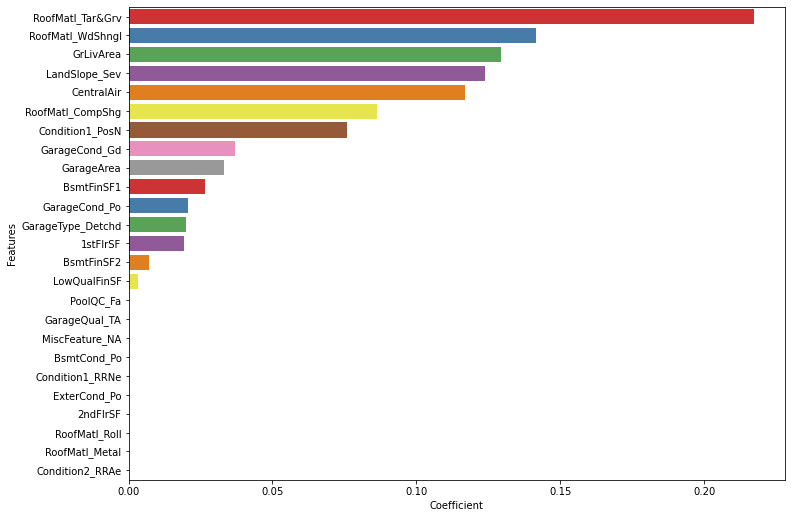

In [72]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(40,40))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = df)
plt.show()

- The above graph displays the top variables based on the Lasso Regression model that are significant in predicting the price of a house.

# Observations and Conclusion

Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
It is always advisable to use simple yet robust model.

- The optimal lambda value in case of Ridge and Lasso is as below:
 - Ridge: 3
 - Lasso: 0.0002
- The Number of features used by the model:
 - Ridge: 100
 - Lasso: 74
- The Mean Squared error in case of Ridge and Lasso are:
 - Ridge: 0.142047
 - Lasso: 0.146804
- The Mean Squared Error of Lasso is slightly higher than that of Ridge
- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

- Hence based on Lasso, the factors that generally affect the price are the Roof Material used, Ground living Area of the house, Slope of the property, Central Air conditioning, Garage Area and quality of Finish, Overall quality and condition of the house, Total basement area in square feet and the Basement finished square feet area

- The variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house. 

#### Advise
- When the market value of the property is lower than the Predicted Sale Price, company should make the investment.

# Assignment-based Subjective Questions

#### Question 1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [83]:
## Doubling value of optimal alpha in Ridge which was previously 3
ridge_double= Ridge(alpha= 6)
ridge_double.fit(X_train, y_train)

Ridge(alpha=6)

In [84]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef2= pd.Series(ridge_double.coef_, index= X_train.columns)
top_10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top_10_ridge2

PoolQC_Gd              -0.198364
Condition2_PosN        -0.168450
Neighborhood_StoneBr    0.130375
Neighborhood_NridgHt    0.126800
BldgType_Twnhs         -0.113866
MSSubClass_160         -0.110881
Neighborhood_Crawfor    0.109714
CentralAir              0.106909
OverallQual             0.103366
LandSlope_Sev           0.092161
dtype: float64

In [85]:
## Doubling value of optimal alpha in Lasso which was previously 0.0002
lasso_double= Lasso(alpha= .0004)
lasso_double.fit(X_train, y_train)

Lasso(alpha=0.0004)

In [86]:
# Top 10 features with double the value of optimal alpha in Lasso
lasso_coef2= pd.Series(lasso_double.coef_, index= X_train.columns)
top_10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top_10_lasso2

PoolQC_Gd              -0.783320
Condition2_PosN        -0.538341
Exterior1st_BrkComm    -0.170609
Neighborhood_StoneBr    0.147778
Neighborhood_NridgHt    0.136416
GrLivArea               0.128672
BldgType_Twnhs         -0.126294
Functional_Maj2        -0.116969
Neighborhood_Crawfor    0.115009
CentralAir              0.113077
dtype: float64

In [89]:
# Checking no. of features in Ridge and Lasso models
selected_features= len(lasso_coef2[lasso_coef2 != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', X_train.shape[1])

Features selected by Lasso: 63
Features present in Ridge: 100


#### Question 3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [73]:
# Checking top 5 features in our lasso model
top25_features_lasso.nlargest()

RoofMatl_Tar&Grv        0.217230
Neighborhood_StoneBr    0.158988
Neighborhood_NridgHt    0.142995
RoofMatl_WdShngl        0.141495
GrLivArea               0.129408
dtype: float64

As Neighborhood_StoneBr,Neighborhood_NridgHt,RoofMatl_WdShngl, and RoofMatl_Tar&Grv are dummy variable, we'll drop entire Neighborhood and RoofMatl features.



In [74]:
# Checking all dummy variables
list_1 = X_train.columns[X_train.columns.str.startswith('Neighborhood')].tolist()
list_2 = X_train.columns[X_train.columns.str.startswith('RoofMatl')].tolist()
list_3 = ['GrLivArea']
list_1.extend(list_2)
list_1.extend(list_3)
list_1

['Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'RoofMatl_CompShg',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'GrLivArea']

In [75]:
# Droping above features from X_train and X_test
X_train_new = X_train.drop(list_1, axis= 1)
X_test_new = X_test.drop(list_1, axis= 1)
X_train_new.shape, X_test_new.shape

((1021, 88), (439, 88))

In [76]:
# Building Lasso model with these features
lassoNew= Lasso(alpha= .0002)
lassoNew.fit(X_train_new, y_train)

Lasso(alpha=0.0002)

In [77]:
# Top 5 features after droping top 5 features of Previous Lasso model
lasso_coef_new= pd.Series(lassoNew.coef_, index= X_train_new.columns)
top5_lasso_new=  lasso_coef_new[abs(lasso_coef_new[lasso_coef_new != 0]).nlargest().index]
top5_lasso_new

PoolQC_Gd             -0.978240
Condition2_PosN       -0.715990
Functional_Sev        -0.272704
Exterior1st_BrkComm   -0.260420
Heating_Grav          -0.172727
dtype: float64

In [ ]:
PoolQC_Gd             Good Pool Quality
Condition2_PosN       Condition - Near positive off-site feature--park, greenbelt, etc 
Functional_Sev        Home Functionality
Exterior1st_BrkComm   Exterior covering on house with Brick common
Heating_Grav          Gravity furnace Heating